Implement a Linear Regression with TensorFlow 2.0.

In [82]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [83]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 100

In [84]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [85]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [86]:

# Optimization process.
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        y_pred = linear_regression(X)
        loss = mean_square(y_pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])

    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [87]:

# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()

    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 100, loss: 0.458254, W: 0.472814, b: -0.769260
step: 200, loss: 0.341064, W: 0.425089, b: -0.430910
step: 300, loss: 0.268991, W: 0.387662, b: -0.165567
step: 400, loss: 0.224665, W: 0.358310, b: 0.042520
step: 500, loss: 0.197405, W: 0.335292, b: 0.205708
step: 600, loss: 0.180639, W: 0.317241, b: 0.333683
step: 700, loss: 0.170329, W: 0.303085, b: 0.434045
step: 800, loss: 0.163987, W: 0.291983, b: 0.512750
step: 900, loss: 0.160088, W: 0.283277, b: 0.574474
step: 1000, loss: 0.157689, W: 0.276449, b: 0.622878


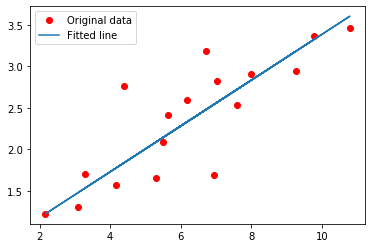

In [88]:

# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

In [89]:
print("w:{}".format(W.numpy()))
print("b:{}".format(b.numpy()))
print(np.array(W*X+b))




w:0.2764493525028229
b:0.6228781938552856
[1.535161  1.8392553 2.1433496 2.4778533 2.5386722 1.7751192 3.3262763
 2.3318882 2.721129  1.221944  2.5696344 3.6060433 2.0916538 2.833644
 2.1859226 3.185564  1.4798712]
